In [1]:
# cd /mnt/59E0-214E/data/Jack/SavageLab/scripts/tecantaloupe
%cd /Volumes/Shared/data/Jack/SavageLab/scripts/tecantaloupe

/Volumes/Shared/data/Jack/SavageLab/scripts/tecantaloupe


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn
import itertools

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt

In [3]:
# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('growth/plate_specs/2018_09_02_pFE_DAB2_protonWire.csv')
name_mapping = ps.well_to_name_mapping()

# PlateSpec contains a DataFrame with the mapping. 
ps.df

value_type               name                                            \
column                      1                  2                      3   
A               CAF+pJJD019wt      CAF+pFE-sfGFP      CAF+pJJD019_NK235   
B               CAF+pJJD019wt      CAF+pFE-sfGFP      CAF+pJJD019_NK235   
C               CAF+pJJD019wt      CAF+pFE-sfGFP      CAF+pJJD019_NK235   
D               CAF+pJJD019wt      CAF+pFE-sfGFP      CAF+pJJD019_NK235   
E           CAF+pJJD019wt+aTc  CAF+pFE-sfGFP+aTc  CAF+pJJD019_NK235+aTc   
F           CAF+pJJD019wt+aTc  CAF+pFE-sfGFP+aTc  CAF+pJJD019_NK235+aTc   
G           CAF+pJJD019wt+aTc  CAF+pFE-sfGFP+aTc  CAF+pJJD019_NK235+aTc   
H           CAF+pJJD019wt+aTc  CAF+pFE-sfGFP+aTc  CAF+pJJD019_NK235+aTc   

value_type                                                \
column                          4                      5   
A               CAF+pJJD019_NH260      CAF+pJJD019_NE431   
B               CAF+pJJD019_NH260      CAF+pJJD019_NE431   
C               CAF+pJJD019_NH260      CAF+pJJD019_NE431   
D               CAF+pJJD019_NH260      CAF+pJJD019_NE431   
E           CAF+pJJD019_NH260+aTc  CAF+pJJD019_NE431+aTc   
F           CAF+pJJD019_NH260+aTc  CAF+pJJD019_NE431+aTc   
G           CAF+pJJD019_NH260+aTc  CAF+pJJD019_NE431+aTc   
H           CAF+pJJD019_NH260+aTc  CAF+pJJD019_NE431+aTc   

value_type                                                \
column                          6                      7   
A               CAF+pJJD019_NH242      CAF+pJJD019_NH339   
B               CAF+pJJD019_NH242      CAF+pJJD019_NH339   
C               CAF+pJJD019_NH242      CAF+pJJD019_NH339   
D               CAF+pJJD019_NH242      CAF+pJJD019_NH339   
E           CAF+pJJD019_NH242+aTc  CAF+pJJD019_NH339+aTc   
F           CAF+pJJD019_NH242+aTc  CAF+pJJD019_NH339+aTc   
G           CAF+pJJD019_NH242+aTc  CAF+pJJD019_NH339+aTc   
H           CAF+pJJD019_NH242+aTc  CAF+pJJD019_NH339+aTc   

value_type                                                \
column                          8                      9   
A               CAF+pJJD019_NR182      CAF+pJJD019_NK310   
B               CAF+pJJD019_NR182      CAF+pJJD019_NK310   
C               CAF+pJJD019_NR182      CAF+pJJD019_NK310   
D               CAF+pJJD019_NR182      CAF+pJJD019_NK310   
E           CAF+pJJD019_NR182+aTc  CAF+pJJD019_NK310+aTc   
F           CAF+pJJD019_NR182+aTc  CAF+pJJD019_NK310+aTc   
G           CAF+pJJD019_NR182+aTc  CAF+pJJD019_NK310+aTc   
H           CAF+pJJD019_NR182+aTc  CAF+pJJD019_NK310+aTc   

value_type                                                \
column                         10                     11   
A               CAF+pJJD019_ND185      CAF+pJJD019_NR122   
B               CAF+pJJD019_ND185      CAF+pJJD019_NR122   
C               CAF+pJJD019_ND185      CAF+pJJD019_NR122   
D               CAF+pJJD019_ND185      CAF+pJJD019_NR122   
E           CAF+pJJD019_ND185+aTc  CAF+pJJD019_NR122+aTc   
F           CAF+pJJD019_ND185+aTc  CAF+pJJD019_NR122+aTc   
G           CAF+pJJD019_ND185+aTc  CAF+pJJD019_NR122+aTc   
H           CAF+pJJD019_ND185+aTc  CAF+pJJD019_NR122+aTc   

value_type                         
column                         12  
A               CAF+pJJD019_NK347  
B               CAF+pJJD019_NK347  
C               CAF+pJJD019_NK347  
D               CAF+pJJD019_NK347  
E           CAF+pJJD019_NK347+aTc  
F           CAF+pJJD019_NK347+aTc  
G           CAF+pJJD019_NK347+aTc  
H           CAF+pJJD019_NK347+aTc

In [4]:
parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('growth/data/2018_09_04_pFE_DAB2_protonWire_2.xlsx')

blanked = timecourse.blank()
# You can blank each well against it's own early timepoints
# by not setting blank_wells

# Smooth with default params.
smoothed = blanked.smooth()

/usr/local/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)
/Volumes/Shared/data/Jack/SavageLab/scripts/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)


<Figure size 720x720 with 0 Axes>

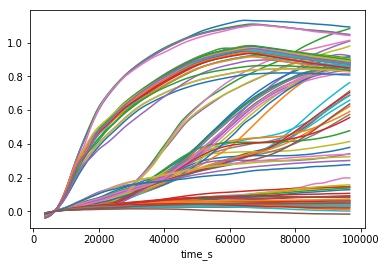

In [5]:
# Smoothed & blanked data.
fig = plt.figure(figsize=(10,10))
OD_data = smoothed.data_for_label('abs600')
OD_data.plot(x='time_s', legend=False)
plt.show()

In [6]:
means = smoothed.mean_by_name(ps)
sems = smoothed.sem_by_name(ps)

mean_OD = means.data_for_label('abs600')
sems_OD = sems.data_for_label('abs600')

In [7]:
# groupings of samples for plotting
pos = [c for c in mean_OD.columns
       if c.startswith('CAF+pJJD019wt')]
neg = [c for c in mean_OD.columns
       if c.startswith('CAF+pFE-sf')]
exp = [c for c in mean_OD.columns
       if c.startswith('CAF+pJJD019_')]

In [8]:
# mean_OD

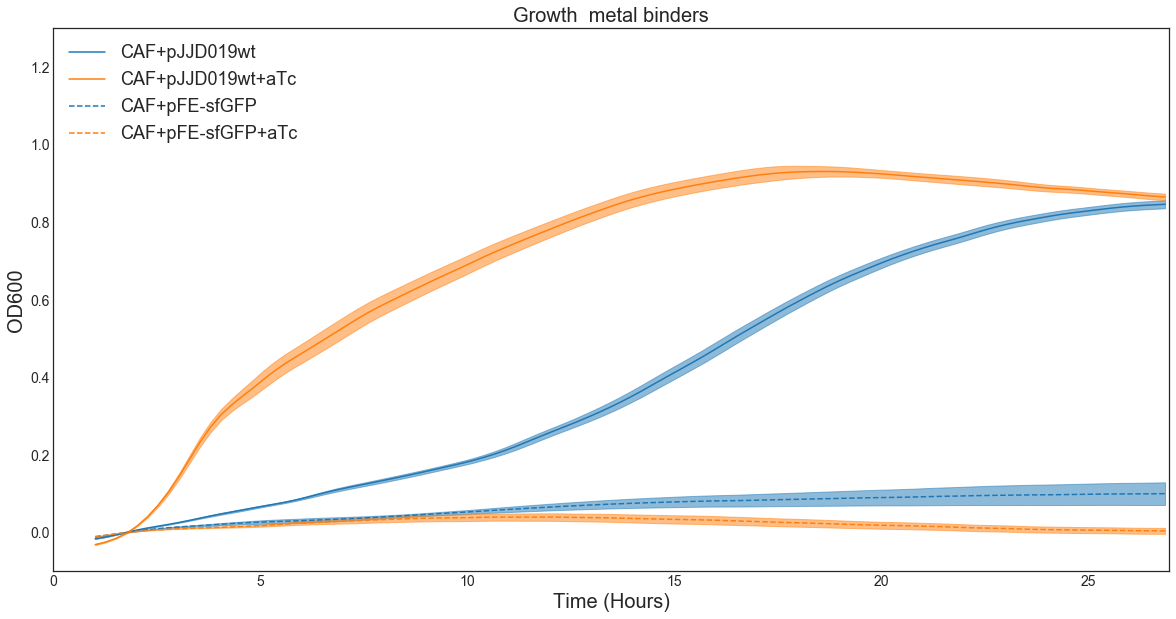

In [9]:
seaborn.set_style('white')
pos_to_plot = pos
exp_to_plot = exp
neg_to_plot = neg

plt.figure(figsize=(20,10))
time_h = mean_OD.time_s / (60.0*60.0)

colors = seaborn.color_palette()
for i, c in enumerate(pos_to_plot):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color)

for i, c in enumerate(neg_to_plot):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color,ls='--')
    
# for i, c in enumerate(exp_to_plot):
#     label = c
#     color = colors[i % len(colors)]
#     plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
#                      color=color, alpha=0.5)
#     plt.plot(time_h, mean_OD[c], label=label, color=color,ls='-.')
plt.legend(loc=2, fontsize=18)
plt.xlim(0, np.max(time_h)+.1)
plt.ylim(-0.1, 1.3)
plt.xticks(np.arange(0, np.max(time_h)+.1, 5), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Growth  metal binders', fontsize=20)
plt.xlabel('Time (Hours)', fontsize=20)
plt.ylabel('OD600', fontsize=20)

plt.show()

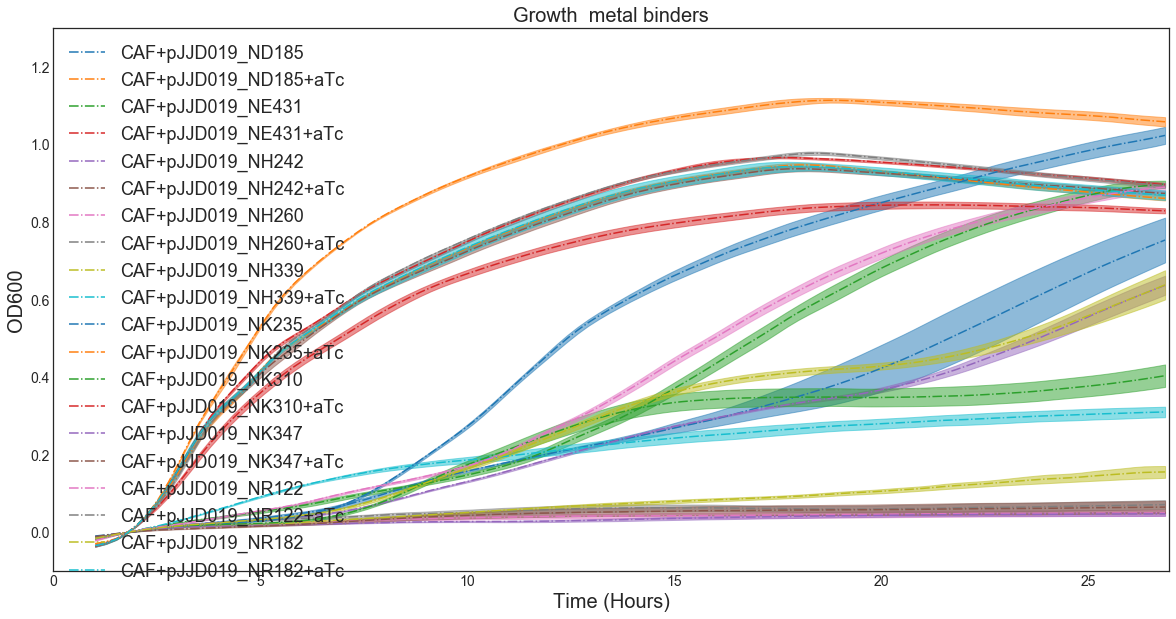

In [10]:
seaborn.set_style('white')
pos_to_plot = pos
exp_to_plot = exp
neg_to_plot = neg

plt.figure(figsize=(20,10))
time_h = mean_OD.time_s / (60.0*60.0)

colors = seaborn.color_palette()
# for i, c in enumerate(pos_to_plot):
#     label = c
#     color = colors[i % len(colors)]
#     plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
#                      color=color, alpha=0.5)
#     plt.plot(time_h, mean_OD[c], label=label, color=color)

# for i, c in enumerate(neg_to_plot):
#     label = c
#     color = colors[i % len(colors)]
#     plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
#                      color=color, alpha=0.5)
#     plt.plot(time_h, mean_OD[c], label=label, color=color,ls='--')
    
for i, c in enumerate(exp_to_plot):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color,ls='-.')
plt.legend(loc=2, fontsize=18)
plt.xlim(0, np.max(time_h)+.1)
plt.ylim(-0.1, 1.3)
plt.xticks(np.arange(0, np.max(time_h)+.1, 5), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Growth  metal binders', fontsize=20)
plt.xlabel('Time (Hours)', fontsize=20)
plt.ylabel('OD600', fontsize=20)

plt.show()

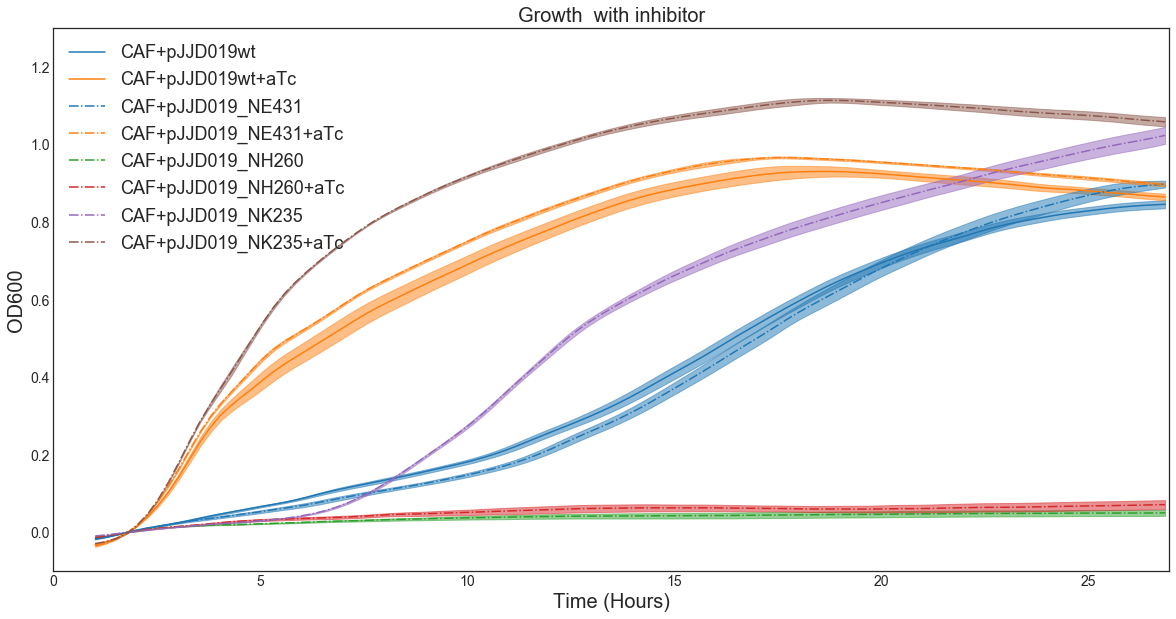

In [11]:
exp_jack = [c for c in mean_OD.columns
       if c.startswith('CAF+pJJD019_NK235') or c.startswith('CAF+pJJD019_NH260') or c.startswith('CAF+pJJD019_NE431')]

seaborn.set_style('white')
pos_to_plot = pos
exp_to_plot = exp_jack
neg_to_plot = neg

plt.figure(figsize=(20,10))
time_h = mean_OD.time_s / (60.0*60.0)

colors = seaborn.color_palette()
for i, c in enumerate(pos_to_plot):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color)

# for i, c in enumerate(neg_to_plot):
#     label = c
#     color = colors[i % len(colors)]
#     plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
#                      color=color, alpha=0.5)
#     plt.plot(time_h, mean_OD[c], label=label, color=color,ls='--')
    
for i, c in enumerate(exp_to_plot):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color,ls='-.')
plt.legend(loc=2, fontsize=18)
plt.xlim(0, np.max(time_h)+.1)
plt.ylim(-0.1, 1.3)
plt.xticks(np.arange(0, np.max(time_h)+.1, 5), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Growth  with inhibitor', fontsize=20)
plt.xlabel('Time (Hours)', fontsize=20)
plt.ylabel('OD600', fontsize=20)

plt.show()

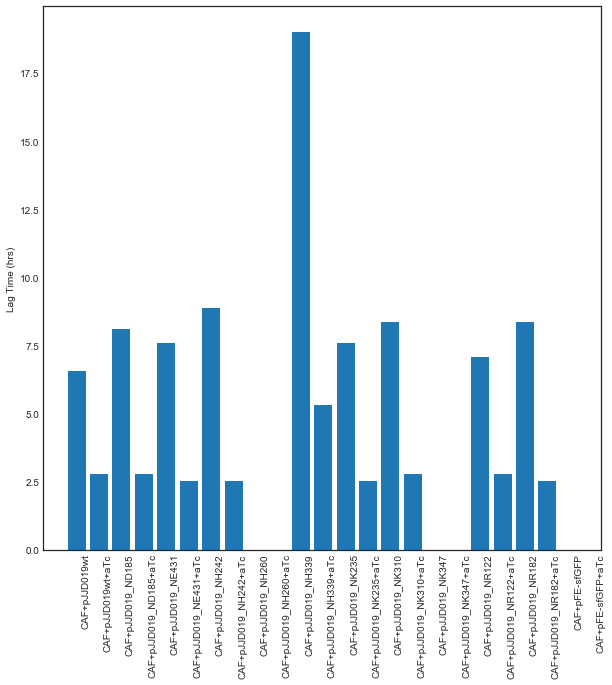

In [12]:

lag_times = means.LagTime(density_label='abs600')

labels = sorted(pos) + sorted(exp) + sorted(neg)
lags = [lag_times[l] for l in labels]

# Note - samples that don't cross the threshold get a 0 lag value.
figure = plt.figure(figsize=(10,10))
xs = np.arange(len(lags))
plt.bar(xs, lags)
plt.ylabel('Lag Time (hrs)')
plt.xticks(xs + 0.4, labels, rotation=90)
plt.show()

/Volumes/Shared/data/Jack/SavageLab/scripts/tecantaloupe/growth/plate_time_course.py:384: RuntimeWarning: invalid value encountered in log
  log_data = np.log(well_data)
/Volumes/Shared/data/Jack/SavageLab/scripts/tecantaloupe/growth/plate_time_course.py:394: RuntimeWarning: All-NaN slice encountered
  if np.nanmin(local_data) < log_lb:


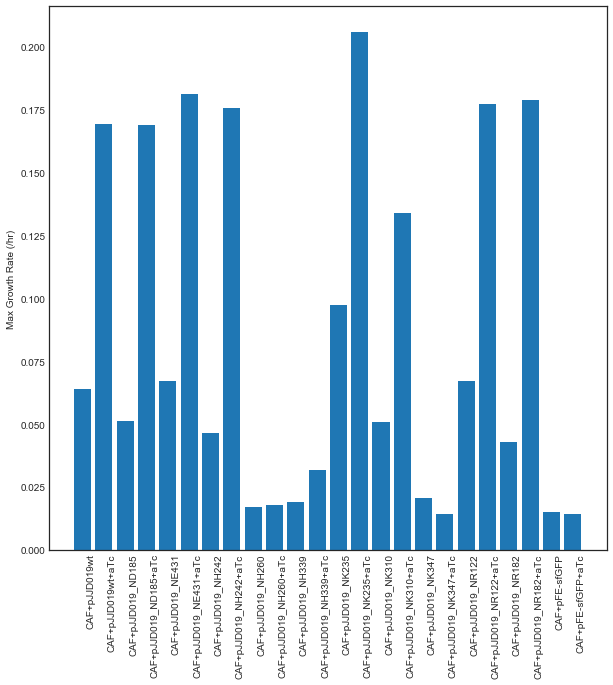

In [13]:
growth_rates = means.MaxGrowthRates(density_label='abs600')

labels = sorted(pos) + sorted(exp) + sorted(neg)
grs = [growth_rates[l] for l in labels]

figure = plt.figure(figsize=(10,10))
xs = np.arange(len(lags))
plt.bar(xs, grs)
plt.ylabel('Max Growth Rate (/hr)')
plt.xticks(xs + 0.4, labels, rotation=90)
plt.show()

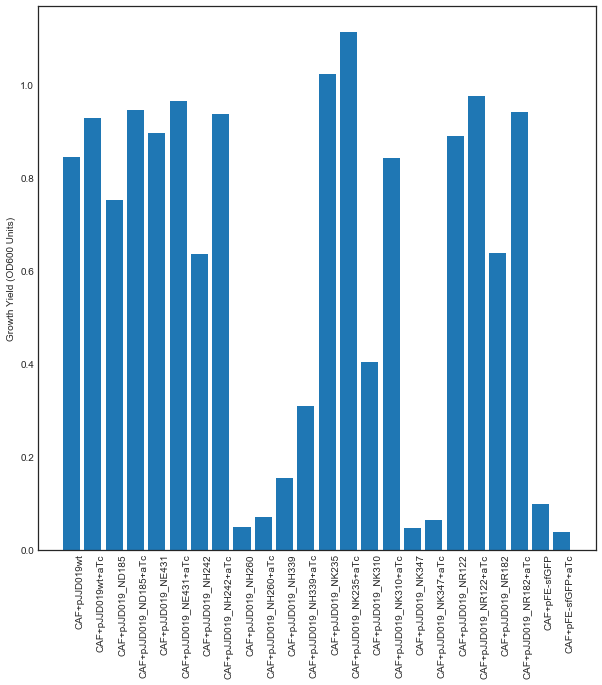

In [14]:
yields = means.GrowthYield(density_label='abs600')

labels = sorted(pos) + sorted(exp) + sorted(neg)
ylds = [yields[l] for l in labels]

figure = plt.figure(figsize=(10,10))
xs = np.arange(len(ylds))
plt.bar(xs, ylds)
plt.ylabel('Growth Yield (OD600 Units)')
plt.xticks(xs + 0.4, labels, rotation=90)
plt.show()

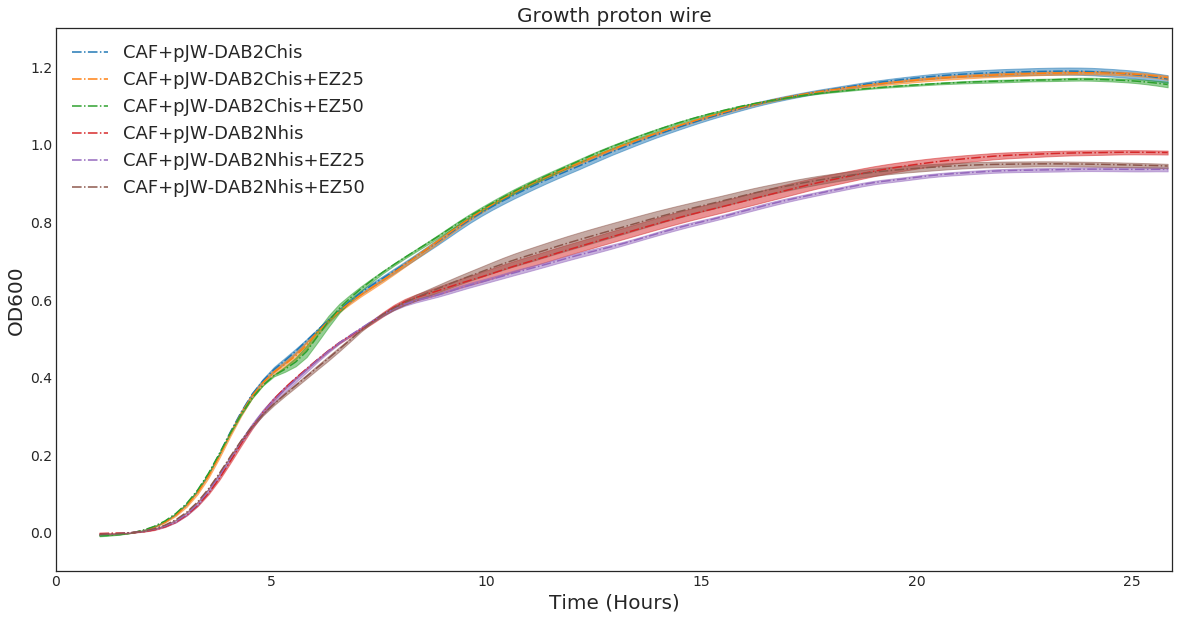

In [36]:
seaborn.set_style('white')
pos_to_plot = pos
exp_to_plot = exp_jw
neg_to_plot = neg

plt.figure(figsize=(20,10))
time_h = mean_OD.time_s / (60.0*60.0)

colors = seaborn.color_palette()
# for i, c in enumerate(pos_to_plot):
#     label = c
#     color = colors[i % len(colors)]
#     plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
#                      color=color, alpha=0.5)
#     plt.plot(time_h, mean_OD[c], label=label, color=color)

# for i, c in enumerate(neg_to_plot):
#     label = c
#     color = colors[i % len(colors)]
#     plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
#                      color=color, alpha=0.5)
#     plt.plot(time_h, mean_OD[c], label=label, color=color,ls='--')
    
for i, c in enumerate(exp_to_plot):
    label = c
    color = colors[i % len(colors)]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color,ls='-.')
plt.legend(loc=2, fontsize=18)
plt.xlim(0, np.max(time_h)+.1)
plt.ylim(-0.1, 1.3)
plt.xticks(np.arange(0, np.max(time_h)+.1, 5), fontsize=14)
plt.yticks(fontsize=14)
plt.title('Growth proton wire', fontsize=20)
plt.xlabel('Time (Hours)', fontsize=20)
plt.ylabel('OD600', fontsize=20)

plt.show()

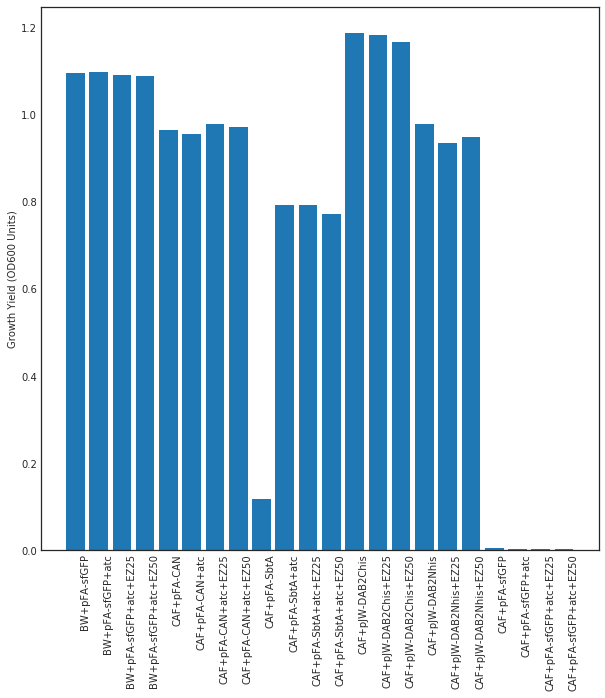

In [38]:
yields = means.GrowthYield(density_label='abs600')

labels = sorted(pos) + sorted(exp_to_plot) + sorted(neg)
ylds = [yields[l] for l in labels]

figure = plt.figure(figsize=(10,10))
xs = np.arange(len(ylds))
plt.bar(xs, ylds)
plt.title('', fontsize=20)
plt.ylabel('Growth Yield (OD600 Units)')
plt.xticks(xs + 0.4, labels, rotation=90)
plt.show()